In [1]:
import h5py
import numpy as np

import time
import os
import string

import sys

import matplotlib.pylab as plt

# Writing strings to a file

In [2]:
sentence=['this','is','a','sentence']
data = []

for i in range(10000):
    data += sentence
print(len(data))
longest_word=len(max(data, key=len))
print('longest_word=',longest_word)

dt = h5py.special_dtype(vlen=str)

arr = np.array(data,dtype='S'+str(longest_word))

with h5py.File('outfile.h5','w') as h5File:
    dset = h5File.create_dataset('words',data=arr,dtype=dt, compression='gzip',compression_opts=9)
    print(dset.shape, dset.dtype)

    h5File.flush()
    h5File.close()


40000
longest_word= 8
(40000,) object


# Another shot at writing and reading strings

In [3]:
h5File=h5py.File('xxx.h5','w')

strList=['asas','asas','asas']

#dt = h5py.special_dtype(vlen=str)
dt = h5py.string_dtype(encoding='utf-8')

dset = h5File.create_dataset('strings',(len(strList),1),dtype=dt)
for i,s in enumerate(strList):
    dset[i] = s

h5File.flush()
h5File.close()



#################

f = h5py.File('xxx.h5', 'r')

print(list(f.keys()))

print(f['strings'])
x = f['strings']

for a in x:
    print(a)


['strings']
<HDF5 dataset "strings": shape (3, 1), type "|O">
[b'asas']
[b'asas']
[b'asas']


# Writing groups under groups

In [4]:
outfilename = 'foo.h5'

if os.path.exists(outfilename):
  os.remove(outfilename)
else:
  print(f"{outfilename} file does not exist")


f = h5py.File(outfilename,'w')
print(f.name)

grp = f.create_group("bar")
subgrp = grp.create_group("baz")

print(subgrp.name)


foo.h5 file does not exist
/
/bar/baz


# Timing tests for large writes

In [5]:
outfilename = 'data_TEST.h5'

if os.path.exists(outfilename):
  os.remove(outfilename)
else:
  print(f"{outfilename} file does not exist")

f = h5py.File(outfilename,'a')



data_TEST.h5 file does not exist


In [ ]:
#list(string.ascii_lowercase)

In [6]:
print(''.join(np.random.choice(list(string.ascii_lowercase), size=5)))

vbvcz


In [7]:
ngroups = 10
nchars_in_name = 5

ndatasets_in_group = 20

data = {}

# Make the groups
for n in range(ngroups):
    name = ''.join(np.random.choice(list(string.ascii_lowercase), size=nchars_in_name))
    
    # Keep track of our data
    data[name] = {}
    
    group_names = list(f.keys())
    
    if name not in group_names:
        grp = f.create_group(name)
        
        # Make the datasets in each group
        for nd in range(ndatasets_in_group):
            dname = ''.join(np.random.choice(list(string.ascii_lowercase), size=nchars_in_name))

            data[name][dname] = []
            # Create this at write time
            #dset = grp.create_dataset(dname, dtype='f')
            

In [8]:
print(list(f.keys()))

['camti', 'hqogn', 'lwwsj', 'otkto', 'otrux', 'sxylt', 'vjpty', 'vsmcx', 'yzxlm', 'zqqck']


In [10]:
def printname(name):
    print(name)
#f.visit(printname)

In [11]:
#data

In [12]:
# Fill the data
nevents = 400000
nentries_per_group = (1, 10)

for group in data.keys():
    nentries = nevents*np.random.randint(nentries_per_group[0],nentries_per_group[1])
    print(f"{group}: {nentries}")
    for dset in data[group].keys():
        data[group][dset] = np.random.random(nentries)

vjpty: 400000
yzxlm: 1600000
otrux: 1200000
zqqck: 2400000
lwwsj: 800000
hqogn: 3600000
vsmcx: 2000000
camti: 2000000
otkto: 400000
sxylt: 800000


In [13]:
f

<HDF5 file "data_TEST.h5" (mode r+)>

In [14]:
#data
time.time()

1686176972.1678097

In [15]:
# Fill the data

start = time.time()
print(f"Starting to fill file with {nevents} events at {start}")

for group in data.keys():
    grp = f[group]
    print(f"Writing {group} and {len(data[group].keys())} datasets")
    for dname in data[group].keys():
        #print(list(f[group].keys()))
        if dname in f[group].keys():
            fullname = f"{group}/{dname}"
            del f[fullname]
        else:
            fullname = f"{group}/{dname}"
            #print(f"\t{fullname}")
            dset = grp.create_dataset(dname, data=data[group][dname],compression="gzip", compression_opts=9)


stop = time.time()
print(f"Finished filling file with {nevents} events at {stop}")
print(f"Time to fill: {stop-start:0.2f} seconds")

#f.close()

Starting to fill file with 400000 events at 1686176976.6532223
Writing vjpty and 20 datasets
Writing yzxlm and 20 datasets
Writing otrux and 20 datasets
Writing zqqck and 20 datasets
Writing lwwsj and 20 datasets
Writing hqogn and 20 datasets
Writing vsmcx and 20 datasets
Writing camti and 20 datasets
Writing otkto and 20 datasets
Writing sxylt and 20 datasets
Finished filling file with 400000 events at 1686177025.5412707
Time to fill: 48.89 seconds


In [16]:
f.close()

In [17]:
#sys.getsizeof(data['qlxnz']['oyipv'])

In [18]:
#sys.getsizeof(data['qlxnz'])

### Try opening the file

In [19]:
f = h5py.File(outfilename,'r')

In [20]:
def printname(name):
    print(name)
f.visit(printname)

camti
camti/bdhlx
camti/cnpgh
camti/efkez
camti/hfinl
camti/htdgd
camti/krvhe
camti/nonni
camti/ocwpq
camti/odboe
camti/pkvmz
camti/psbqt
camti/qcink
camti/qzvvh
camti/rlumw
camti/rmxod
camti/uglqr
camti/waegz
camti/wnhpc
camti/xlswi
camti/xsuzm
hqogn
hqogn/edvzu
hqogn/iycbx
hqogn/jdhij
hqogn/jkinm
hqogn/jrkuw
hqogn/lpgik
hqogn/lzout
hqogn/ndcqq
hqogn/nowmd
hqogn/pkgce
hqogn/qscaa
hqogn/skrhy
hqogn/somvv
hqogn/subik
hqogn/uhxyy
hqogn/vlgjm
hqogn/wtoqu
hqogn/xhmrd
hqogn/xvjaw
hqogn/zsvjg
lwwsj
lwwsj/avmwu
lwwsj/bhfwy
lwwsj/dvjlx
lwwsj/dyyti
lwwsj/edycz
lwwsj/evzrx
lwwsj/fikgk
lwwsj/kmeyf
lwwsj/kmydd
lwwsj/malpa
lwwsj/pmhkb
lwwsj/rewmy
lwwsj/rzlam
lwwsj/uddam
lwwsj/uffkn
lwwsj/uryet
lwwsj/vcgoi
lwwsj/vwzob
lwwsj/zezrm
lwwsj/zzukw
otkto
otkto/ansns
otkto/aouwf
otkto/efsvs
otkto/enzii
otkto/fvhbr
otkto/gvmch
otkto/hknsw
otkto/iikkt
otkto/jgohp
otkto/kvgdp
otkto/lceua
otkto/mwjpc
otkto/nfrkf
otkto/ofqqa
otkto/qakkb
otkto/rgufk
otkto/rzisx
otkto/tdibo
otkto/umqzy
otkto/wagoo
otrux
otrux/cbhg

In [23]:
k0 = list(f.keys())[0]
k1 = list(f[k0].keys())[0]

x = f[f'{k0}/{k1}'][()] # This last bit returns a numpy array

print(type(x))
print(x)

#x.values

print(len(x))

<class 'numpy.ndarray'>
[0.74392151 0.38308485 0.11881756 ... 0.14232058 0.59179996 0.34157213]
2000000


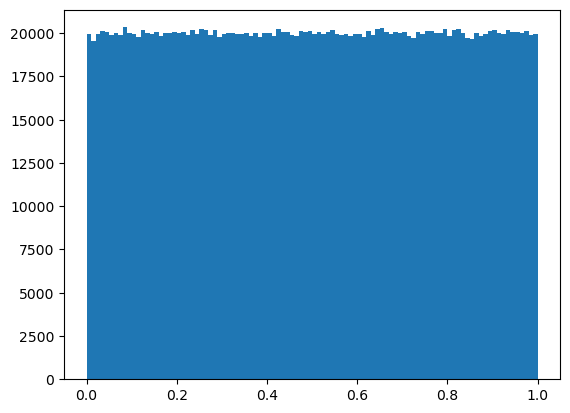

In [22]:
plt.hist(x,bins=100);

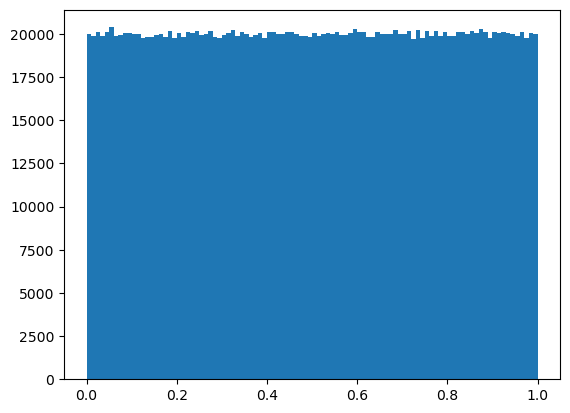

In [24]:
plt.hist(np.random.random(len(x)),bins=100);

In [25]:
grp = f[k0]
print(grp)

<HDF5 group "/camti" (20 members)>


In [26]:
x = grp[k1][()]

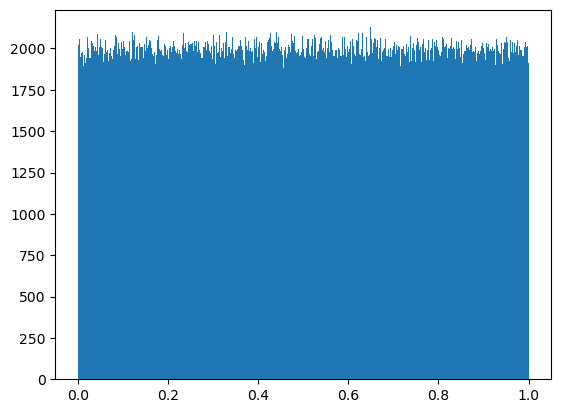

In [27]:
len(x)
plt.hist(x,bins=1000);

In [28]:
for group in f.keys():
    grp = f[group]
    print(group)
    for i,dname in enumerate(f[group].keys()):
        fullname = f"{group}/{dname}"
        #print(f[fullname])
        #if i == 0:
        #    plt.figure()
        #    plt.hist(f[fullname],bins=100)

camti
hqogn
lwwsj
otkto
otrux
sxylt
vjpty
vsmcx
yzxlm
zqqck


In [29]:
f.close()